# Decision Trees

## Decision Tree Algorithm
A supervised learning algorithm can be used for both classification and regression.  
Split data into subsets based on features and minimize entropy of the datasets.  

Advantages:  
* no need to scale the data as only one column is inspected at a time
* this algorithm could be intelligent to handle missing data or categorical values
* this algorithm is self-explainary and easy to understand how decision is made

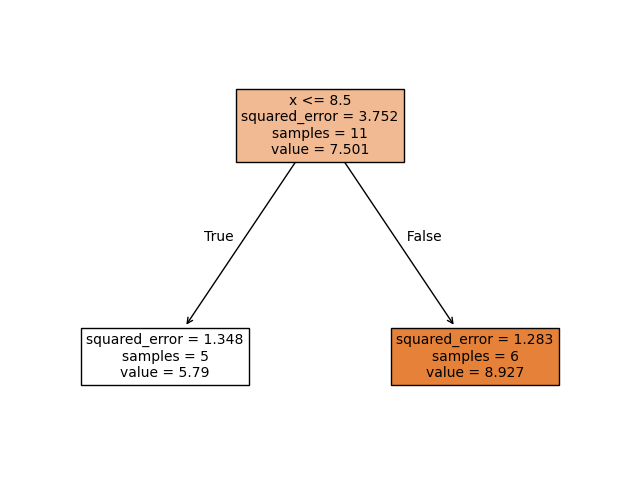

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# load anscombe's quartet
import pandas as pd
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
anscombe = (pd.DataFrame({'x': x, 'y1': y1, 'y2': y2, 'y3': y3, 'x4': x4, 'y4': y4})
            )

# create a decision stump - an underfit model
dt = DecisionTreeRegressor(max_depth=1)
X = anscombe[['x']]
y = anscombe['y1']
dt.fit(X, y)

# plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(dt, ax=ax, feature_names=['x'], filled=True, fontsize=10)

c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


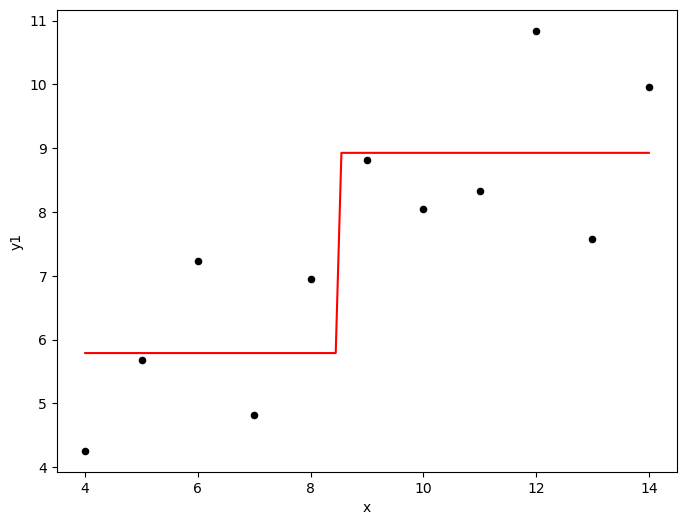

In [3]:
# plot the data and predictions on the same plot
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
x1 = np.linspace(4, 14, 100)
y1 = dt.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')

c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


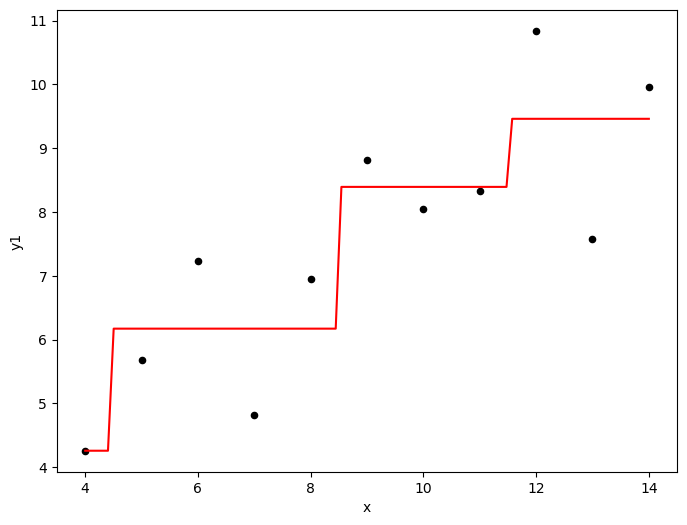

In [4]:
# plot to two levels
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt2.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')

c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


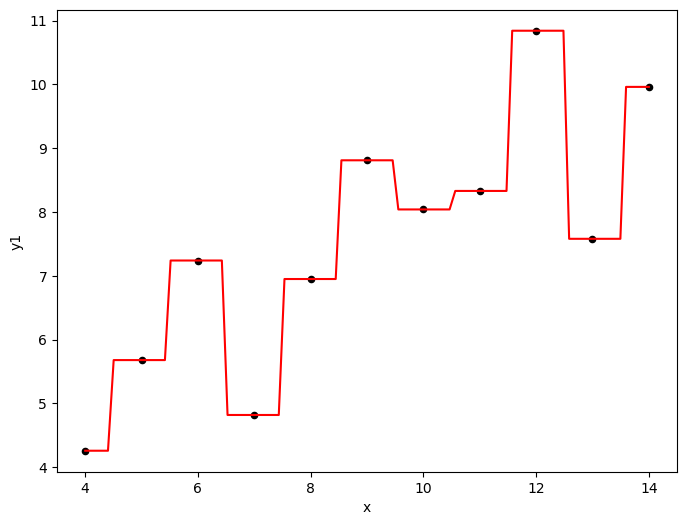

In [ ]:
# plot to unlimited levels - an overfit model
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
dt2 = DecisionTreeRegressor(max_depth=None)
dt2.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt2.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')

## Real World with Aircraft Elevators

In [19]:
import pandas as pd
from scipy.io import arff

elevators, _ = arff.loadarff("data/dataset_2202_elevators.arff")
elev = pd.DataFrame(elevators)
elev.head()

,climbRate,Sgz,'p','q',curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,0.0,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,0.0,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.030


In [9]:
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']
dt_elev = DecisionTreeRegressor(max_depth=3)
dt_elev.fit(X_elev, y_elev)

DecisionTreeRegressor(max_depth=3)

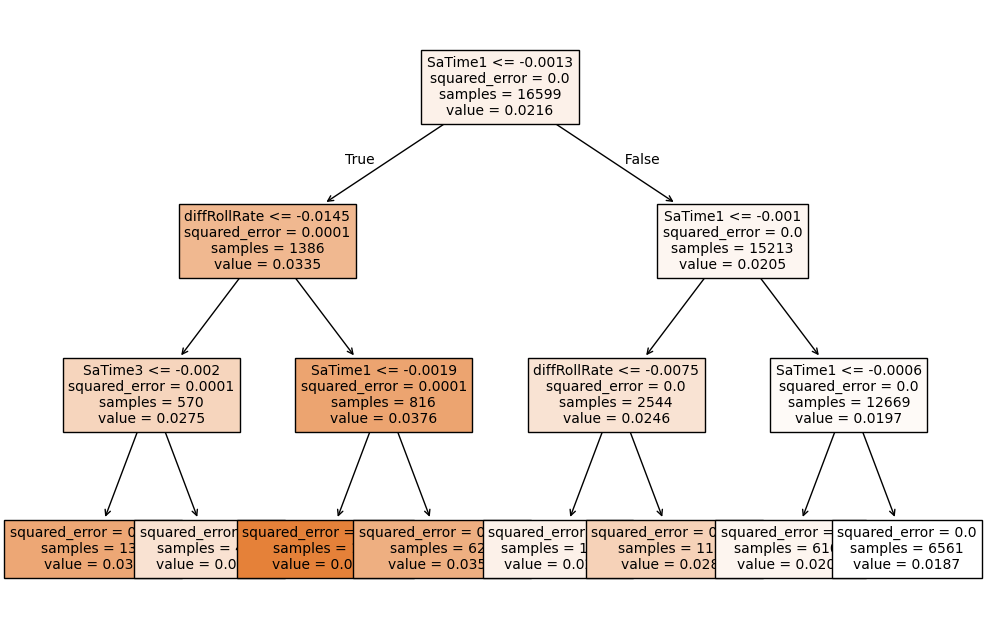

In [11]:
# plot the tree
fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(dt_elev, ax=ax, feature_names=X_elev.columns, filled=True, fontsize=10, precision=4)

In [12]:
dt_elev.score(X_elev, y_elev)

0.48738100110114524

In [13]:
from sklearn.linear_model import LinearRegression
lr_elev = LinearRegression()
lr_elev.fit(X_elev, y_elev)
lr_elev.score(X_elev, y_elev)

0.8134759022968554

<Axes: >

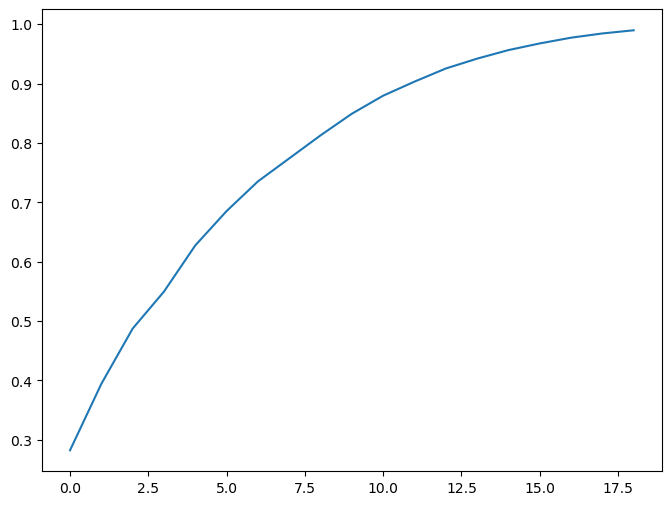

In [14]:
# loop over depths and plot the results
scores = []
for i in range(1, 20):
  dt = DecisionTreeRegressor(max_depth=i)
  dt.fit(X_elev, y_elev)
  scores.append(dt.score(X_elev, y_elev))

pd.Series(scores).plot.line(figsize=(8, 6))

Text(0.5, 1.0, 'Validation Curve for Decision Tree')

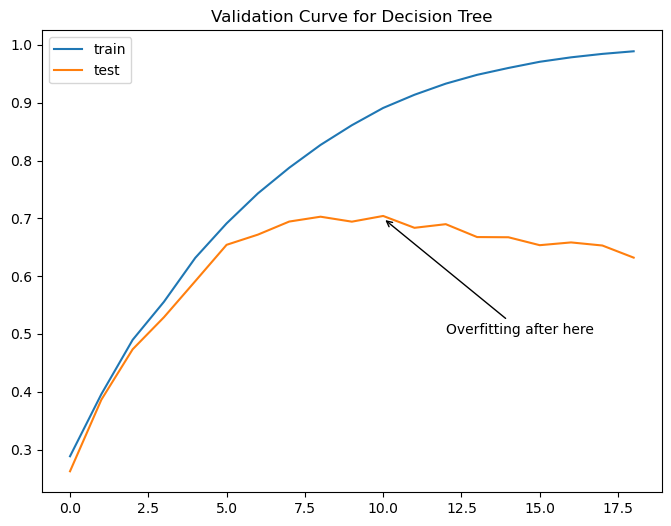

In [ ]:
# split data and plot results of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)
test_scores = []
train_scores = []
for i in range(1, 20):
  dt = DecisionTreeRegressor(max_depth=i)
  dt.fit(X_train, y_train)
  test_scores.append(dt.score(X_test, y_test))
  train_scores.append(dt.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))
ax.annotate('Overfitting after here', xy=(10, .7), xytext=(12, .5), arrowprops={'arrowstyle': '->'})
ax.set_title('Validation Curve for Decision Tree')

In [17]:
# check how the model can improve with a deeper tree
dt_elev = DecisionTreeRegressor(max_depth=11)
dt_elev.fit(X_train, y_train)
dt_elev.score(X_test, y_test)

0.7110588117699854

In [18]:
lr_elev.fit(X_train, y_train)
lr_elev.score(X_test, y_test)

0.8174575992538525